# Regression
- What is Regression?

**In regression, we are trying to predict a scalar value.**

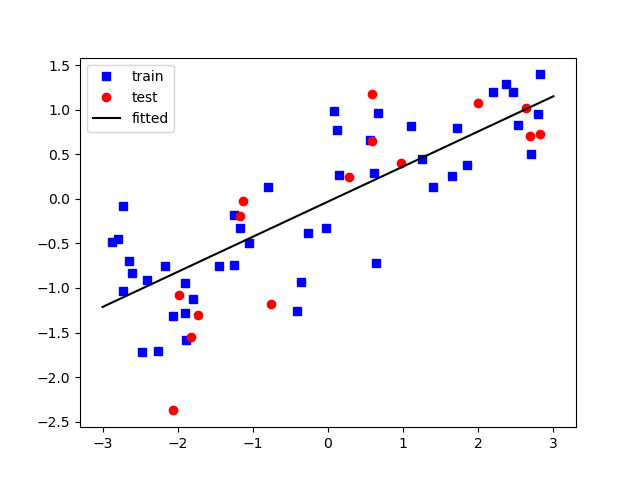

### Concepts

| concept | description |
|:-------:|:-----------:|
| OLS | Ordinary Least Squares, another name for Linear Regression |
| Normal Equation | analytical solution for Linear Regression (slow) |
| Gradient Descent | algorithm that finds a solution iteratively |
| MSE | Mean Square Error |
| MAE | Mean Absolute Error |
| GLM | Generalized Linear Model, superfamily of OLS |
| Polynomial Regression | fitting polynomial features |

## Linear Regression

Linear Regression is a straightforward model. It basically fits a straight line to the data points.

Maths-minded people will think of this:

\begin{align}
\hat{y} = ax + b
\end{align}

Calculate y value from intercept, x value and the gradient!
Here, **a is the slope** of the line and **b the intercept (or bias)**.


However, if x is a vector of n features, you would fit a plane or hyperplane instead. Each of the n features, `x1, x2 .. xn`, has a corresponding **weight** (or coefficient) `w1, w2 .. wn` associated with it. i.e. We can do it for multiple features!

The model then becomes a weighted sum with a **parameter vector a** and the **intercept b**:

\begin{align}
\hat{y} = w{_1}x{_1} + w{_2}x{_2} + w{_3}x{_3} + ... + w{_n}x{_n} + b
\end{align}

**This is still a linear regression model!** But we are now no longer fitting a straight line - it is **now a hyperplane being fitted in a linear regression**!

We can write the whole thing as a **weight vector and a matrix of features with a dot product** of them and an intercept at the end:

\begin{align}
\hat{y} = \vec{w}{^T} . x + b
\end{align}
    
Sometimes this is also written with a + **epsilon, ε - it is an error term!**

\begin{align}
\hat{y} = \vec{w}{^T} . x + b + ε
\end{align}
    
- When this error term is present we find that **linear regression is called Ordinary List Squares (O.L.S)**

#### Speaking of the error-term, what are we usually optimising during a Linear Regression?

### Evaluation of Regression Models

- We're trying to optimise the line of best fit! We want all points to be as close to the line on average as possible! There is a metric for this.

The metric we are using is the **M.S.E - the mean squared error!**

\begin{align}
MSE = \frac{1}{m}\sum_{i=1}^{m}(y_i-\hat{y}_i)^2
\end{align}

or 

\begin{align}
MSE = \frac{1}{m}\sum_{i=1}^{m}(y_i-\boldsymbol{w}^T \cdot \boldsymbol{x}_i)^2
\end{align}

This error metric is a bit more difficult to understand than the **M.A.E - Mean Absolute Error**:

\begin{align}
MAE = \frac{1}{m}\sum_{i=1}^{m}abs(y_i-\hat{y}_i)
\end{align}

It is also very sensitive to outliers! They can ruin your line of best fit!

We can use this kind of model to predict quantities!! It could be a stockprice, the price of electricity tomorrow, the number of passengers on a flight...

It has advantages compared to Logistic Regression:

- we can get statsmodels table for Linear Regression as well!

### How to find parameters for a Linear Regression model?

#### Qs:
I) How do we find those coefficients?

II) What are the caveats?

#### As:
I) There are two ways to come up witht the coefficients:

1. Normal Equation: Linear models are generally easy to solve and very fast. There is an equation called the Normal Equation that finds the parameter analytically (also called closed form solution). 
    - However, it is slow - **don't use it!** Practically not feasible to use it most of the time.

    \begin{align}
    w = \frac{X^Ty}{X^TX}
    \end{align}
    
2. Gradient Descent:  Starts with random coefficients and begins to optimise them to find the optimal parameters! e.g. Deep learning uses gradient descent. 
    - Differential calculus is done to get to the coefficients, not total guesswork! It performs minimisation steps until it reaches optimal values for the coefficients.
    
II) The caveats - aka assumptions:

1.  We have a range of x-values! Might seem obvious but if all our x-values were the same we wouldn't be able to perform a linear regression.
    
    
2.  There is a correlation between X and y - if we didn't have a correlation we would just have a random cloud of points! 
    
    - We can quantify the correlation with the $R{^2}$ value! It has a value between -1 and +1 - if it is + 1 it is a perfect linear relationship in one direction, and -1 would be perfect linear relationship in the other direction
    - Goodness of Fit - **the coefficient of determination, $R{^2}$** tells you how much of the variance in your response can be explained by your features. So, an $R{^2}$ value of 1.0 means your model has a perfect fit – no errors in your predictions!
    - On the other hand, an $R{^2}$ value of 0.0 means your model is no better than a simple average over all points.
    
\begin{align}
R^2 = 1 - \frac{SSE}{SS_{total}} = 1 - \frac{\sum_{i=1}^m(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^m(y^{(i)}-\overline{y})^2}
\end{align}

    - You can also think of this as comparing your predictions to the simplest possible prediction: the average!

3. Assume that our features $x{_1}$, $x{_2}$,... are linearly independent! We cannot express one by the other using multiplication!
    
    - (Remember in Titanic example we managed to express Female/Male and Passenger Class as expressions of each other)
    
4. The features are scaled! if they are scaled the gradient descent will be faster (We have same thing in LogisticRegression)

    
5. The error is independent of X - **RESIDUALS are independent of X** - at each X the residuals should be the same!
    
    
6. Errors are normally distributed - we want a lot of points close to the line, and very few that are far from the line, and very very few outliers!
    
    
7. More data points than features!


8. Residuals not autocorrelated - residual and error the same thing - it is the distance from the point to the model

These assumptions are a tool that tell us whether we can use a model or not! Could test each of these individually to check the validity of pur model - gives us an idea of what selecting a good model actually means!

https://www.researchgate.net/post/What_is_the_difference_between_residuals_and_errors

#### Summary

| Assumption | Description |
|:----------:|:-----------:|
| positive variance in X | the X values need to be different (trivial) |
| n(datapoints) > n(features) | otherwise the model overfits | 
| mean(residuals) = 0 | calculate and check | 
| normal residuals | the errors approximately follow a normal distribution |
| homoscedasticity of residuals | equal variance over X, check with Q-Q-plot |
| linearly independent features | if this is violated, intercept cannot be | determined, check via VIF | 
| X uncorrelated with residuals | features are uncorrelated with the error, check via VIF | 
| residuals not autocorrelated | check with ACF or Durbin Watson |

**If these assumptions are violated, the resulting model will be biased.**



### Polynomial Regression
- Adding Polynomial terms - still a linear model!

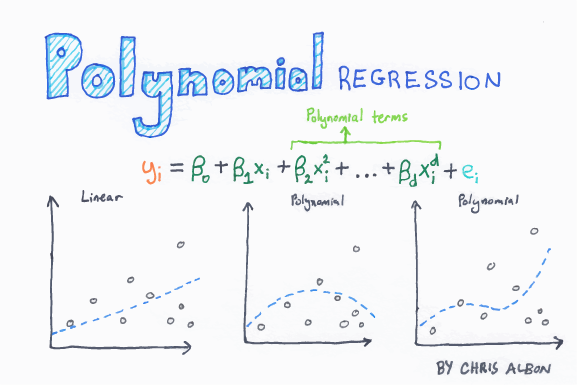

Models with polynomial terms - the maths is completely the same, the assumptions are also the same.

Even if in the end you have a curved line you can still be doing linear regression, it is that powerful!

### Example

In [1]:
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import mglearn
import pylab as plt

X, y = mglearn.datasets.make_wave(n_samples=60)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(Xtrain, ytrain)

print("Coefficients:", lr.coef_)
print("Intercept   :", lr.intercept_)

print("train score :", lr.score(Xtrain, ytrain))
print("test score  :", lr.score(Xtest, ytest))

Coefficients: [0.39390555]
Intercept   : -0.031804343026759746
train score : 0.6700890315075756
test score  : 0.65933685968637


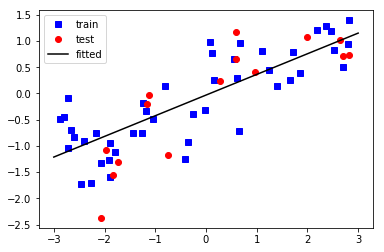

In [4]:
# plot da ting
import numpy as np
Xideal = np.linspace(-3.0, 3.0, 100)
yideal = lr.coef_[0] * Xideal + lr.intercept_

plt.figure()
plt.plot(Xtrain, ytrain, 'bs', label="train")
plt.plot(Xtest, ytest, 'ro', label="test")
plt.plot(Xideal, yideal, 'k-', label="fitted")
plt.legend()
plt.savefig('linear.png')
plt.show()

## Exercise: Boston

Use a linear regression model to predict house prices - The objective is to predict the value of prices of the house using the given features.

#### The score here will be the Mean Square Error, rather than the accuracy!

The feature engineering side is very interesting though!

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
type(boston)

sklearn.utils.Bunch

In [8]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


- data - contains the information for various houses
- target - prices of the houses
- feature_names - names of the features
- DESCR - describes the dataset

In [9]:
boston['data'].shape

(506, 13)

In [10]:
boston['target'].shape

(506,)

In [11]:
boston['target'][:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [12]:
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


- CRIM -  per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town
- CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per §10,000
- PTRATIO - pupil-teacher ratio by town
- B - $1000(Bk - 0.63){^2}$ where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000’s

The prices of the house indicated by the variable `MEDV` is our **target variable** and the remaining are the **feature variables** based on which we will predict the value of a house.


In [13]:
df['MEDV'] = boston['target']

In [14]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [16]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [18]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((379, 13), (127, 13), (379,), (127,))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


Text(0, 0.5, 'Indexed house Price')

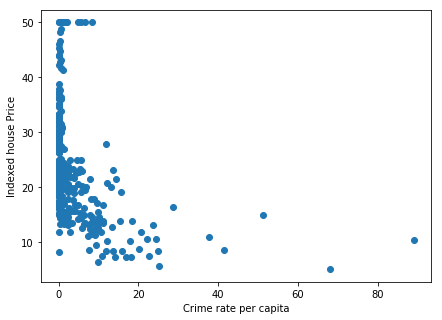

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(x=Xtrain['CRIM'], y = ytrain)

plt.xlabel('Crime rate per capita')
plt.ylabel('Indexed house Price')

In [21]:
lr = LinearRegression().fit(Xtrain, ytrain)

In [31]:
for i in range(12):
    print(f'{Xtrain.columns[i]} coefficient, a{i}: {lr.coef_[i]}')
    
print(f"\nIntercept, b: {lr.intercept_}")
print(f"train score: {lr.score(Xtrain, ytrain)}")
print(f"test score: {lr.score(Xtest, ytest)}")

CRIM coefficient, a0: -0.12832263775902558
ZN coefficient, a1: 0.0295517751480768
INDUS coefficient, a2: 0.048859093369039215
CHAS coefficient, a3: 2.7735032595049187
NOX coefficient, a4: -16.238829154312135
RM coefficient, a5: 4.368754764401979
AGE coefficient, a6: -0.009248081580812514
DIS coefficient, a7: -1.4008666753340935
RAD coefficient, a8: 0.2577612427766927
TAX coefficient, a9: -0.00995694820452078
PTRATIO coefficient, a10: -0.923122944274801
B coefficient, a11: 0.01318541989239224

Intercept, b: 29.83642016383913
train score: 0.7480872598623441
test score: 0.6844267283527129


#### Here, we've run a linear regression including all of the features without editing or removing any of them - the score kind of reflects that!

## Exploratory Data Analysis

Let’s first plot the distribution of the target variable `MEDV`. We will use the `distplot` function from the seaborn library.

/Users/maximcondon/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


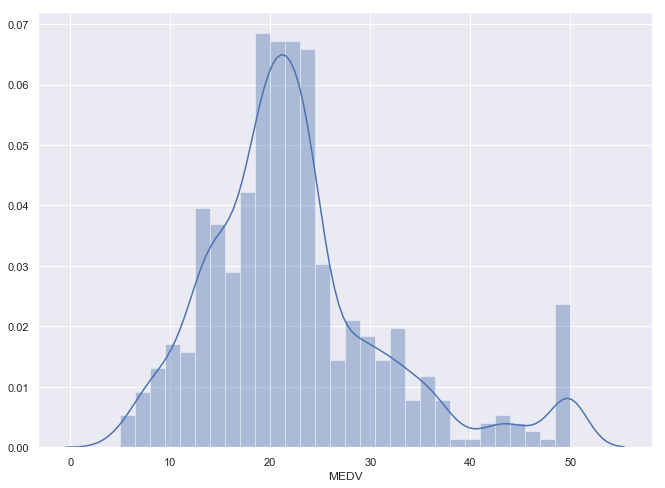

In [33]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(y, bins=30)
plt.show()

We can see that the values of MEDV are distributed normally with few outliers.

**THIS IS GOOD FOR CAVEAT NUMBER 6!**

### Correlation Matrix
- A correlation matrix that measures the linear relationships between the variables, so we can see what correlates to what!

In [45]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


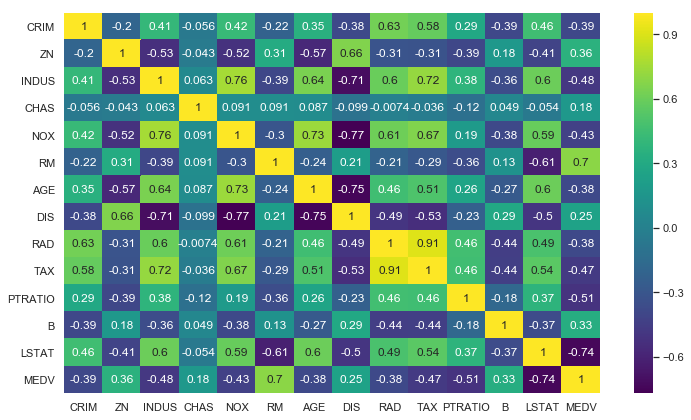

In [46]:
plt.figure(figsize=(12,7))
sns.heatmap(X.corr(), annot=True, cmap='viridis')

- For a linear regression model to work, we select features which have a high correlation with our target `MEDV`. In this case, we can see that RM (av. number rooms) has a strong positive correlation with MEDV (0.7) whereas LSTAT (% lower status of the population) has a high negative correlation with MEDV!

- **An important point in selecting features for a linear regression model is to check for multi-co-linearity!** The **features RAD, TAX have a correlation of 0.91**, i.e. they are strongly correlated to one another. They **should not both be selected for training the model**, whilst the same applies to the features **DIS and AGE which have a correlation of -0.75**! 

Let's plot all of the features against the house price and see which have a linear relationship:

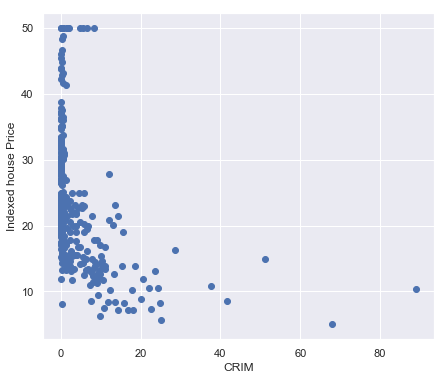

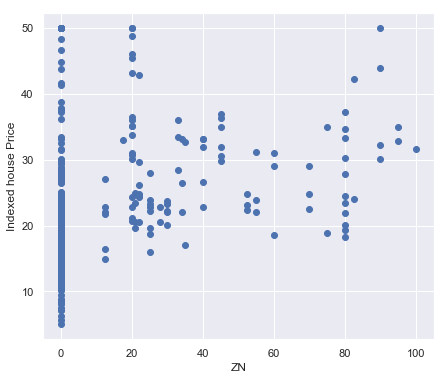

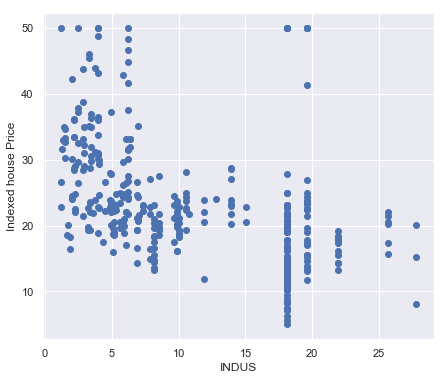

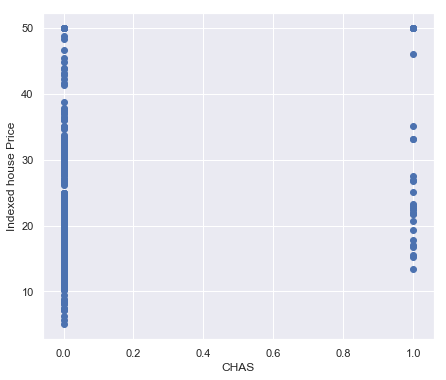

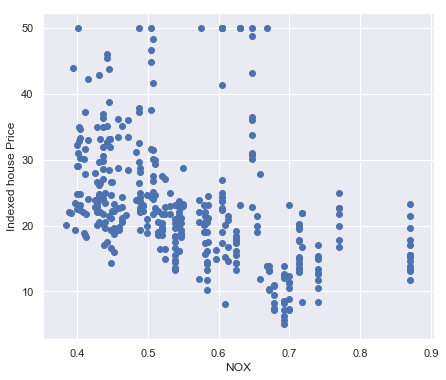

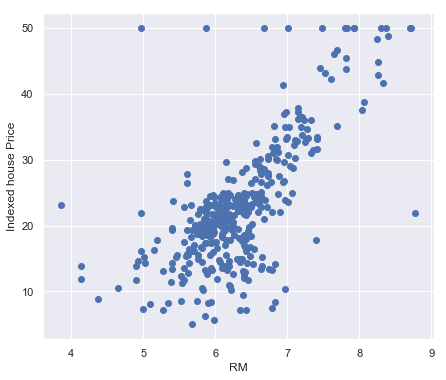

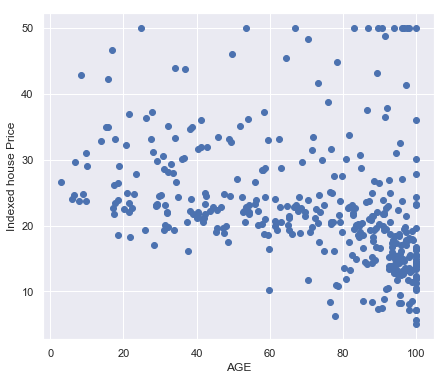

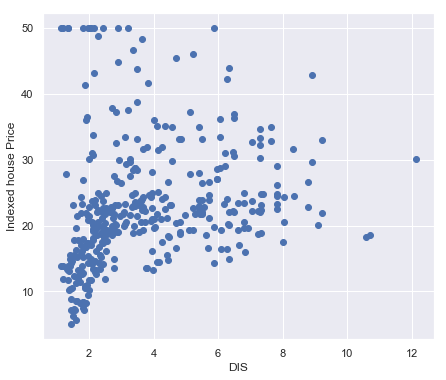

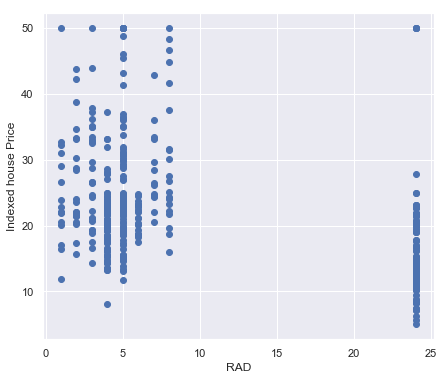

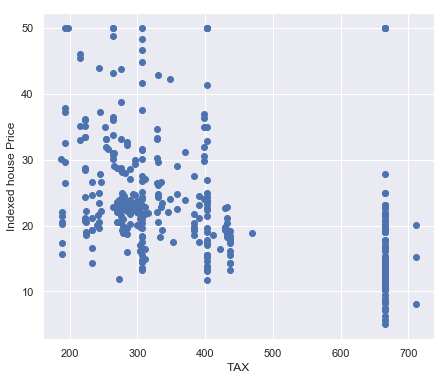

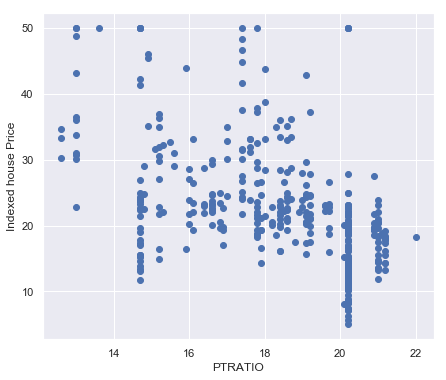

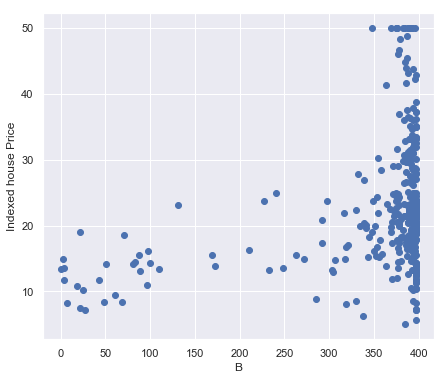

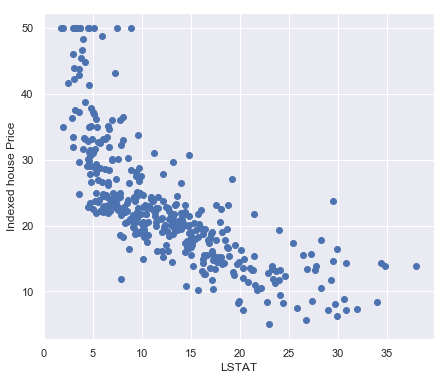

In [50]:
for each in Xtrain.columns:
    plt.figure(figsize=(7,6))
    plt.scatter(Xtrain[each], y=ytrain)
    plt.xlabel(each)
    plt.ylabel('Indexed house Price')

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town
- CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per §10,000
- PTRATIO - pupil-teacher ratio by town
- B - $1000(Bk - 0.63){^2}$ where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000’s

As we can see above, we have a couple of fairly linear relationships between our features and the price MEDV, e.g. INDUS, NOX, AGE, DIS, PTRATIO(ish) but tend to have lots of outliers!

As we gleamed from the correlation matrix, RM and LSTAT have very good linear relationships with price, let's take a closer look at them:

In [54]:
features = ['LSTAT', 'RM']
y = df['MEDV']

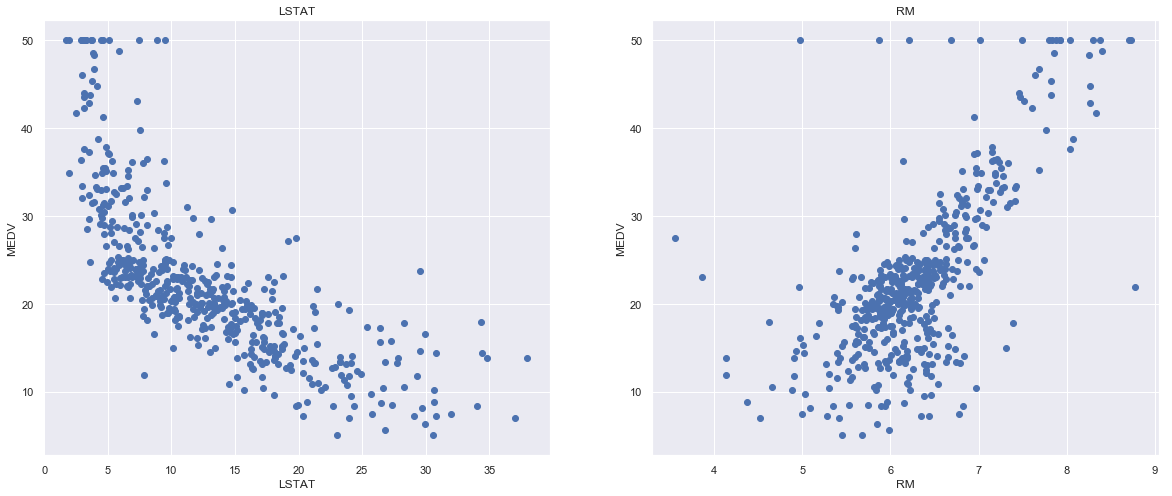

In [62]:
plt.figure(figsize=(20, 8))

features = ['LSTAT', 'RM']
y = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = y
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

- The prices increase as the value of RM (number of rooms) increases linearly. There are few outliers and the data seems to be capped at 50.

- The prices tend to decrease with an increase in LSTAT (% lower status population), although it doesn’t look to be following an exactly linear line.